# Preparation

In [116]:
import numpy as np
from xml.etree import ElementTree
import cv2
from PIL import Image
import tensorflow as tf
import csv
import argparse
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import Normalize

%matplotlib inline

In [117]:
save_path = '/home/ubuntu/Sayama/tmpdir/2020_08_04/video1top_png/image_02/data/'


In [118]:
file_names=["frame_000250.png"]

#If you want to try all files, please execute below:
#for file in os.listdir(save_path):
    # Getting File Names
    #if os.path.isfile(os.path.join(save_path, file)):
        #file_names.append(os.path.basename(file))

In [119]:
file_names_2 = ["frame_000250"]

#If you want to try all files, please execute below:
#for file in os.listdir(save_path):
    #if os.path.isfile(os.path.join(save_path, file)):
        #file2 = file.rstrip('.png\n')
        #file_names_2.append(file2)

# Parameters for Abs Rel Error Calculation

In [120]:
min_depth=5
max_depth=80
bf=109.65
d_inf=2.67

# Check File Content

In [121]:
def draw_images(image_file):
    
    global save_path
    
    f_name=save_path+"/"+image_file
    gray_img=cv2.imread(f_name)
   

    
    
    return gray_img



frame_000250.png


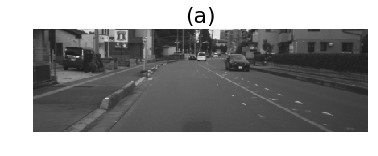

In [122]:
#Showing img
for number, image in enumerate(file_names[0:1]):
    print(image)
    gray_img = draw_images(image)
    plt.title("(a)", fontsize=22)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))


# Before fine tuning

In [123]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_273486/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [124]:
pred_depth = cv2.resize(pred_depth, (416,128))

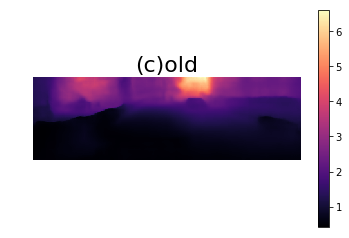

In [125]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(c)old", fontsize=22)
plt.axis('off')
plt.colorbar()

In [126]:
# Answer Disparity Map Directory
ans_int_disp_map_dir="/home/ubuntu/Sayama/tmpdir/2020_08_04/video1middle_png/image_02/data"

In [127]:
def draw_images_ans_int(image_file):
    
    global ans_int_disp_map_dir
    
    f_name=ans_int_disp_map_dir+"/"+image_file
    ans_int_disp_map=cv2.imread(f_name)
    ans_int_disp_map=cv2.cvtColor(ans_int_disp_map, cv2.COLOR_RGB2GRAY)
   

    
    
    return ans_int_disp_map




frame_000250.png


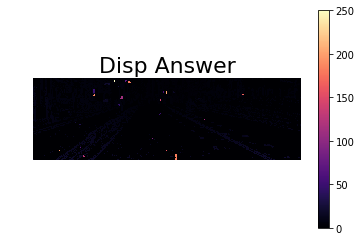

In [128]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)
    #plt.figure(dpi=50)
    plt.imshow(ans_int_disp_map, cmap='magma')
    plt.title("Disp Answer", fontsize=22)
    plt.axis('off')
    plt.colorbar()

In [129]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [130]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [131]:
gt_depth=gt_depth*mask

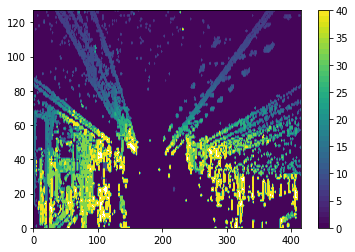

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)

cores = ax.contourf(gt_depth, levels=range(41))
cbar = plt.colorbar(cores)

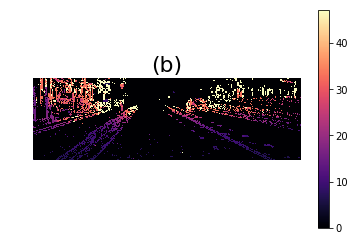

In [136]:
plt.imshow(gt_depth, cmap='magma')
plt.title("(b)", fontsize=22)
plt.axis('off')
plt.colorbar()

In [18]:
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])

In [19]:
print(scalor)

11.565143204340714


In [20]:
pred_depth[mask] *= scalor

In [21]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

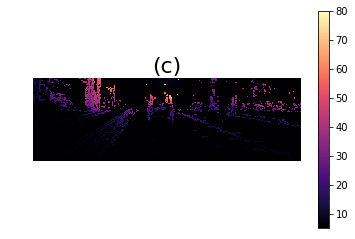

In [22]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(c)", fontsize=22)
plt.axis('off')
plt.colorbar()

# After fine tuning

In [23]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [24]:
pred_depth = cv2.resize(pred_depth, (416,128))

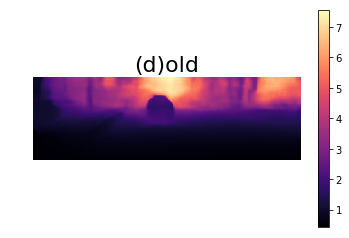

In [25]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(d)old", fontsize=22)
plt.axis('off')
plt.colorbar()

frame_000100.png


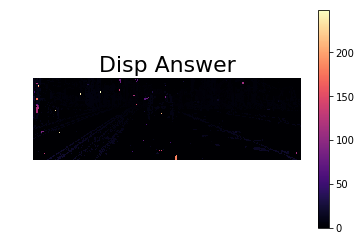

In [26]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)
    #plt.figure(dpi=50)
    plt.imshow(ans_int_disp_map, cmap='magma')
    plt.title("Disp Answer", fontsize=22)
    plt.axis('off')
    plt.colorbar()

In [27]:
# Answer Disparity Map Directory
ans_int_disp_map_dir="/home/ubuntu/Sayama/tmpdir/2020_08_04/video1middle_png/image_02/data"

In [28]:
def draw_images_ans_int(image_file):
    
    global ans_int_disp_map_dir
    
    f_name=ans_int_disp_map_dir+"/"+image_file
    ans_int_disp_map=cv2.imread(f_name)
    ans_int_disp_map=cv2.cvtColor(ans_int_disp_map, cv2.COLOR_RGB2GRAY)
   

    
    
    return ans_int_disp_map



frame_000100.png


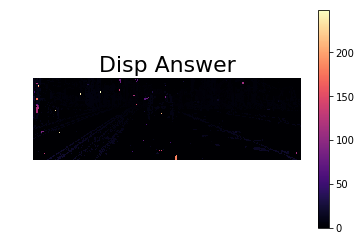

In [29]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)
    #plt.figure(dpi=50)
    plt.imshow(ans_int_disp_map, cmap='magma')
    plt.title("Disp Answer", fontsize=22)
    plt.axis('off')
    plt.colorbar()

In [30]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [31]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [32]:
gt_depth=gt_depth*mask

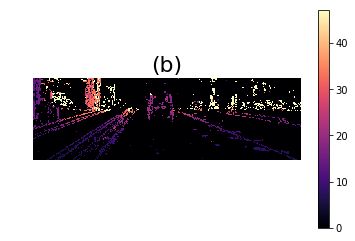

In [33]:

plt.imshow(gt_depth, cmap='magma')
plt.title("(b)", fontsize=22)
plt.axis('off')
plt.colorbar()

In [34]:
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])

In [35]:
print(scalor)

11.200809504575798


In [36]:
pred_depth[mask] *= scalor

In [37]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

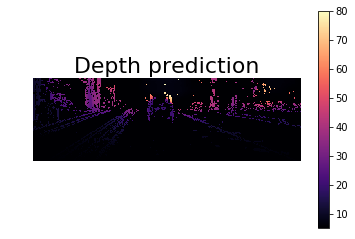

In [38]:
plt.imshow(pred_depth, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [39]:
def compute_errors(gt, pred):
    thresh = np.maximum((gt / pred), (pred / gt))
    a1 = (thresh < 1.25   ).mean()
    a2 = (thresh < 1.25 ** 2).mean()
    a3 = (thresh < 1.25 ** 3).mean()

    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())

    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())

    abs_rel = np.mean(np.abs(gt - pred) / gt)
    
    sq_rel = np.mean(((gt - pred)**2) / gt)

    return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3

In [40]:
num_test=1
i=0

In [41]:
rms     = np.zeros(num_test, np.float32)
log_rms = np.zeros(num_test, np.float32)
abs_rel = np.zeros(num_test, np.float32)
sq_rel  = np.zeros(num_test, np.float32)
d1_all  = np.zeros(num_test, np.float32)
a1      = np.zeros(num_test, np.float32)
a2      = np.zeros(num_test, np.float32)
a3      = np.zeros(num_test, np.float32)
scalors = np.zeros(num_test, np.float32)

In [42]:
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = \
            compute_errors(gt_depth[mask], pred_depth[mask])

print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10} ".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3', 'scalor'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f} ,{:10.4f} ".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean(),scalors.mean()))


   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3,     scalor 
    0.2515,     4.9625,    10.4674,     0.3395,     0.0000,     0.6458,     0.8702,     0.9478 ,    0.0000 


# Scale Matching with acceleration value

In [43]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [44]:
pred_depth = cv2.resize(pred_depth, (416,128))

In [45]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)

frame_000100.png


In [46]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [47]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [48]:
gt_depth=gt_depth*mask

In [49]:
import math

In [50]:
def calc_center(xmin=0,ymin=0,img_height=128,img_width=416,clip_height=128,clip_width=416,dfv_height=128,dfv_width=416):
    center_ratio_x=(img_height//2-xmin)/clip_height
    center_ratio_y=(img_width//2-ymin)/clip_width
    center_x=int(dfv_height*center_ratio_x)
    center_y=int(dfv_width*center_ratio_y)
    return [center_x,center_y]

In [51]:
height=1.2
acceleration=0.065
theta=math.asin(acceleration)
truth_z=height/math.sin(theta)
print(truth_z)

18.46153846153846


In [52]:
center=calc_center()
present_z=pred_depth[center[0]][center[1]]
print(present_z)

1.8812418


In [53]:
scalor=truth_z/present_z
print(scalor)

9.81348515498189


In [54]:
pred_depth[mask] *= scalor

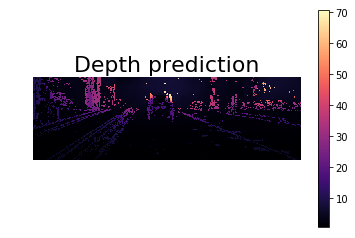

In [55]:
plt.imshow(pred_depth, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [56]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

In [57]:
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

In [58]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10} ".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3', 'scalor'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f} ,{:10.4f} ".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean(),scalors.mean()))



   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3,     scalor 
    0.3010,     4.7743,    11.2179,     0.4028,     0.0000,     0.3594,     0.7962,     0.9134 ,    0.0000 


# No Scale Matching

In [59]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [60]:
pred_depth = cv2.resize(pred_depth, (416,128))

In [61]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)

frame_000100.png


In [62]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [63]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [64]:
gt_depth=gt_depth*mask

In [65]:
scalor=1
print(scalor)

1


In [66]:
pred_depth[mask] *= scalor

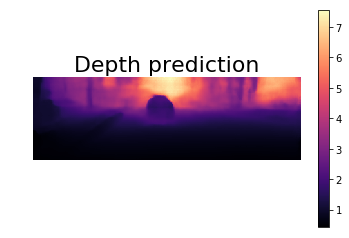

In [67]:
plt.imshow(pred_depth, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [68]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

In [69]:
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

In [70]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10} ".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3', 'scalor'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f} ,{:10.4f} ".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean(),scalors.mean()))




   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3,     scalor 
    0.7081,    16.9923,    25.2583,     1.5754,     0.0000,     0.0174,     0.0793,     0.1692 ,    0.0000 
